<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S6_5_NLP_in_FRENCH_with_FastAI_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Du NLP en Français 

Nous avons fait du NLP avec des datasets classiques et bien connus mais qu'en est il sur des dataset en français ? Voyons cela dans cet exercice

1. Importez les librairies nécessaires à la gestion de texte dans FastAi.

In [0]:
from fastai.text import *
import pandas as pd 
import numpy as np 

2. Importez le dataset *facebook_reviews_disneylandParis_format.csv*

In [0]:
from google.colab import files 

uploaded = files.upload()

Saving facebook_reviews_disneylandParis_format 2.csv to facebook_reviews_disneylandParis_format 2.csv


In [0]:
dataset = pd.read_csv("facebook_reviews_disneylandParis_format 2.csv", error_bad_lines=False, encoding="utf-8")

3. Dans le dataset, ne gardez uniquement les reviews laissées en français 

In [0]:
french_reviews = dataset[dataset.review_lang == "french"]
french_reviews.head()

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
11,726b1a3e2664e8b075129bcd643dbf56,En vacances en région parisienne nous nous som...,2,2017-09-29 00:37:00,00:37,0,Ven,en vacances en région parisienne nous nous som...,french,2017-09,172,25
12,8a71763fbb3da7436b957681b24cc404,Tropbeaufinalpleinlesyeuxoreil,5,2017-09-29 00:16:00,00:16,0,Ven,tropbeaufinalpleinlesyeuxoreil,french,2017-09,30,1
23,ce7abd7798ee036d667c0ad84b85daa7,L'univers Disney reste merveilleux. Toutefois ...,4,2017-09-28 20:24:00,20:24,20,Jeu,l univers disney reste merveilleux toutefois ...,french,2017-09,148,23


4. Nous n'avons besoin que des colonnes *review_format* et *stars*. Adaptez donc le dataset en fonction.

In [0]:
french_reviews = french_reviews[["review_format", "stars"]]
french_reviews.head()

,review_format,stars
0,génial fabuleux exceptionnel j aimerais qu...,5
2,toujours aussi magic féerique,5
11,en vacances en région parisienne nous nous som...,2
12,tropbeaufinalpleinlesyeuxoreil,5
23,l univers disney reste merveilleux toutefois ...,4


5. Séparez votre dataset en un training set et un test set

In [0]:
mask = np.random.rand(len(french_reviews)) < 0.8

In [0]:
french_reviews_train = french_reviews[mask]
french_reviews_test = french_reviews[~mask]

6. Créez maintenant un DataBunch adapté. Faites attention cependant, vous devrez utiliser un Tokenizer différent de celui par défaut. 

[Regardez la documentation en détail ](https://docs.fast.ai/text.transform.html#Tokenizer)

In [0]:
data_lm = TextLMDataBunch.from_df(Path(),
                                  train_df = french_reviews_train,
                                  valid_df = french_reviews_test,
                                  text_cols = 'review_format', 
                                  label_cols= "stars",
                                  tokenizer= Tokenizer(lang="fr")
                                  )

7. Regarder un batch de données préprocessées

In [0]:
data_lm.show_batch()

idx,text
0,une photo ou le moindre petit souvenir xxbos mal organisé trop d attente pour certaines attractions qui n en veux pas le coup à mon goût aucun personnages se baladant librement bof la nourriture hors de prix et c est de la mal bouffe le parking euros c est pas comme si un week end ou une journée à ne te xxunk pas un bras si tu n as pas
1,de problèmes techniques nous sommes sortis de la file pour faire au tre chose au final ratatouille crush coaster attractions non faites crush depuis le nombre d années que je viens j ai jamais réussi à le faire à moins de réserver une journée pour attendre dans la file car aucun fast pass hier les fast pass dans le studios à h fallait tous les prendre entre h et h
2,je suis toujours aussi fan de ce monde a part xxbos émerveillés comme à chaque visite retour en enfance xxbos je ne me lasse pas de chaque visite passée à disneyland un monde féerique que je partage avec ma fille de ans et demie on oublie pas on retourne en enfance visite dans quelques jours hâte xxbos même si la météo etait capricieuse ce septembre l effet magique est resté
3,voiture xxunk ce samedi septembre xxunk et vitre xxunk vol a la clé trois autres voitures sont dans le cas au vue du prix du parc ainsi que celui du parking c est xxunk xxbos super moment que je passe en regardant cette page xxbos super endroit seul hic c est relativement cher faudra faire des gestes aux résidents d ile de france ou aux français ou moins pour donner
4,un temps magnifique xxbos jours à l hôtel santa fe un coup de cœur et un grand coup de chapeau à toutes l équipe du parc un personnel excellent gros point négatif c est de voire les principales attractions à sensation fermées à cause de la pluie même lorsque celles ci a xxunk depuis un petit moment sinon disney reste disney avec de superbes décors et de belles mise en


# Predict next words

7. Créeons un language model learner qui va essayer de faire des prédictions de phrases à partir de mots que vous entrerez en input

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM)

8. Entrainez le modèle sur 3 epochs 

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,7.478172,5.866056,0.074094,00:12
1,6.262771,5.502719,0.106591,00:12
2,5.866450,5.435431,0.117004,00:12


9. Tentez de faire une prédiction des 10 prochains mots de la phrase : `J'aime disneyland parce que `

In [0]:
learn.predict("J'aime disneyland parce que", n_words=10)

"J'aime disneyland parce que xxbos c est est en dire xxbos sont précédentes n"

9b. Les résultats ne sont pas très concluants. Vous pouvez tenter d'entrainer le modèle sur plus d'epoch et vous rapprocher d'un résultat plus correct. Cependant, cela est très couteux en termes de temps. N'hésitez donc pas à sauter cette question si votre entrainement prend trop de temps. 

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,4.899055,4.631601,0.179254,00:16
1,4.743663,4.550622,0.187198,00:17


In [0]:
!nvidia-smi

Mon Jul  8 13:16:56 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    31W /  70W |   4746MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Text classifier

10. On va essayer de faire une prédiction maintenant de la note qu'une personne a laissée en fonction de la reviews qu'elle a écrite. Créez donc un nouveau DataBunch adapté à cette problématique 

In [0]:
data_clas = TextClasDataBunch.from_df(Path("model"), 
                                      train_df = french_reviews_train, 
                                      valid_df = french_reviews_test,
                                      text_cols = "review_format",
                                      label_cols = "stars",
                                      tokenizer= Tokenizer(lang="fr"),
                                      vocab = data_lm.train_ds.vocab
                                      )

11. Créez un modèle adapté 

In [0]:
classifier = text_classifier_learner(data_clas, AWD_LSTM)

12. Entrainez votre modèle sur 3 epochs 

In [0]:
classifier.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.220203,1.242757,0.585612,00:08
1,1.228638,1.230471,0.585612,00:09
2,1.216241,1.269786,0.585612,00:09
3,1.239864,1.237078,0.585612,00:09
4,1.229726,1.230416,0.585612,00:09
5,1.243340,1.221740,0.585612,00:08
6,1.223799,1.221542,0.585612,00:08
7,1.215377,1.218179,0.585612,00:07
8,1.200487,1.217823,0.585612,00:08
9,1.210178,1.220690,0.585612,00:08


13. On va tenter de faire mieux. Entrainez votre modèle en effectuant du fine-tuning sur le learning rate 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-05
Min loss divided by 10: 2.75E-07


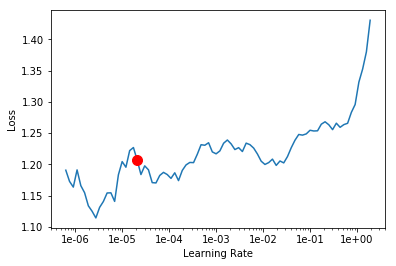

In [0]:
classifier.lr_find()
classifier.recorder.plot(suggestion = True)

In [0]:
classifier.unfreeze()

In [0]:
classifier.fit_one_cycle(4, 2.09E-05)

epoch,train_loss,valid_loss,accuracy,time
0,1.228755,1.221557,0.585612,00:21
1,1.215341,1.213866,0.585612,00:19
2,1.203445,1.199684,0.585612,00:23
3,1.202957,1.192640,0.585612,00:20


In [0]:
classifier.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time


Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken p

KeyboardInterrupt: ignored

14. Puisque nous sommes sur de la classification, tentons de voir ce que nous propose l'interpréteur : ```ClassificationInterpretation```

In [0]:
interp = ClassificationInterpretation.from_learner(classifier)

15. Regardez la matrice de confusion pour voir où votre modèle s'est trompé 

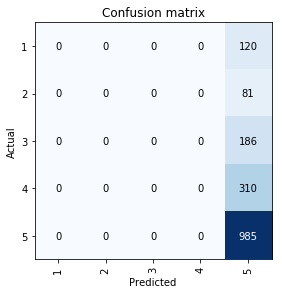

In [0]:
interp.plot_confusion_matrix()

16. Nous allons voir un autre interpréteur. Testez : ```TextClassificationInterpretation```

In [0]:
interp_text = TextClassificationInterpretation.from_learner(classifier)

17. Utilisez la méthode ```show_top_losses``` pour voir quelles sont les prédictions où le modèle s'est le plus trompé 

In [0]:
interp_text.show_top_losses(k=3)

Text,Prediction,Actual,Loss,Probability
xxbos un magnifique séjour a faire et refaire,5,5,3.12,0.64
xxbos une journée au top notre fils de ans y allait pour la première fois et était émerveillé et nous aussi,5,5,3.12,0.64
xxbos j ai passé un séjour absolument extraordinaire,5,5,3.10,0.64


18. Nous allons utiliser une autre méthode qui est : ```show_intrinsic_attention```. Insérez en input la première review de votre dataset et regardez le résultat. 

Que pouvez-vous dire ?

In [0]:
interp_text.show_intrinsic_attention(french_reviews.iloc[0,0])

#### L'output nous montre l'intention de chacun des tokens. Allant de vert = Très positif à rouge = Très négatif 

19. Tentez avec quelques autres reviews pour voir ce que propose votre modèle 

In [0]:
random_reviews = np.random.randn(len(french_reviews))<0.99

interp_text.show_intrinsic_attention(french_reviews[~random_reviews]["review_format"])